# Damaged induced traps

In [8]:
import numpy as np
import festim as F

# diffusion parameters
# hydrogen holtzner mulitplied by factor sqrt(3) for T
D_0 = 2.06e-7 * (3**0.5)
E_D = 0.28

# damaged trap parameters
# defect type I
A_0_1 = 6.1838e-03
E_A_1 = 0.24

trap_D1_K = 9.0e26
trap_D1_n_max = 6.9e25
trap_D2_K = 4.2e26
trap_D2_n_max = 7.0e25

# defect type II
A_0_2 = 6.1838e-03
E_A_2 = 0.30

trap_D3_K = 2.5e26
trap_D3_n_max = 6.0e25
trap_D4_K = 5.0e26
trap_D4_n_max = 4.7e25

# defect type III
A_0_3 = 0
E_A_3 = 1

trap_D5_K = 1.0e26
trap_D5_n_max = 2.0e25

# general trap parameters
trap_1_density = 2e22

# common values
atom_density_W = 6.3222e28
k_B = F.k_B  # eV K-1
minute = 60
day = minute * 60 * 24
week = day * 7
fpy = day * 365
dpa = 5

my_model = F.Simulation(log_level=40)

# define materials
tungsten = F.Material(D_0=D_0, E_D=E_D, id=1)
my_model.materials = F.Materials([tungsten])

# define traps

defined_absolute_tolerance = 1e07
defined_relative_tolerance = 1e-01
defined_maximum_iterations = 10

trap_W_1 = F.Trap(
    k_0=tungsten.D_0 / (1.1e-10**2 * 6 * atom_density_W),
    E_k=tungsten.E_D,
    p_0=1e13,
    E_p=1.04,
    density=2.4e22,
    materials=tungsten,
)
trap_W_damage_1 = F.NeutronInducedTrap(
    k_0=tungsten.D_0 / (1.1e-10**2 * 6 * atom_density_W),
    E_k=tungsten.E_D,
    p_0=1e13,
    E_p=1.15,
    A_0=A_0_1,
    E_A=E_A_1,
    phi=dpa / fpy,
    K=trap_D1_K,
    n_max=trap_D1_n_max,
    materials=tungsten,
    absolute_tolerance=defined_absolute_tolerance,
    relative_tolerance=defined_relative_tolerance,
    maximum_iterations=defined_maximum_iterations,
)
trap_W_damage_2 = F.NeutronInducedTrap(
    k_0=tungsten.D_0 / (1.1e-10**2 * 6 * atom_density_W),
    E_k=tungsten.E_D,
    E_p=1.35,
    p_0=1e13,
    A_0=A_0_1,
    E_A=E_A_1,
    phi=dpa / fpy,
    K=trap_D2_K,
    n_max=trap_D2_n_max,
    materials=tungsten,
    absolute_tolerance=defined_absolute_tolerance,
    relative_tolerance=defined_relative_tolerance,
    maximum_iterations=defined_maximum_iterations,
)
trap_W_damage_3 = F.NeutronInducedTrap(
    k_0=tungsten.D_0 / (1.1e-10**2 * 6 * atom_density_W),
    E_k=tungsten.E_D,
    p_0=1e13,
    E_p=1.65,
    A_0=A_0_2,
    E_A=E_A_2,
    phi=dpa / fpy,
    K=trap_D3_K,
    n_max=trap_D3_n_max,
    materials=tungsten,
    absolute_tolerance=defined_absolute_tolerance,
    relative_tolerance=defined_relative_tolerance,
    maximum_iterations=defined_maximum_iterations,
)
trap_W_damage_4 = F.NeutronInducedTrap(
    k_0=tungsten.D_0 / (1.1e-10**2 * 6 * atom_density_W),
    E_k=tungsten.E_D,
    p_0=1e13,
    E_p=1.85,
    A_0=A_0_2,
    E_A=E_A_2,
    phi=dpa / fpy,
    K=trap_D4_K,
    n_max=trap_D4_n_max,
    materials=tungsten,
    absolute_tolerance=defined_absolute_tolerance,
    relative_tolerance=defined_relative_tolerance,
    maximum_iterations=defined_maximum_iterations,
)
trap_W_damage_5 = F.NeutronInducedTrap(
    k_0=tungsten.D_0 / (1.1e-10**2 * 6 * atom_density_W),
    E_k=tungsten.E_D,
    p_0=1e13,
    E_p=2.05,
    A_0=A_0_3,
    E_A=E_A_3,
    phi=dpa / fpy,
    K=trap_D5_K,
    n_max=trap_D5_n_max,
    materials=tungsten,
    absolute_tolerance=defined_absolute_tolerance,
    relative_tolerance=defined_relative_tolerance,
    maximum_iterations=defined_maximum_iterations,
)

my_model.traps = F.Traps(
    [
        trap_W_1,
        trap_W_damage_1,
        trap_W_damage_2,
        trap_W_damage_3,
        trap_W_damage_4,
        trap_W_damage_5,
    ]
)

vertices = np.linspace(0, 2e-03, num=1000)
my_model.mesh = F.MeshFromVertices(vertices)

# define temperature
my_model.T = F.Temperature(value=800)

# define boundary conditions
my_model.boundary_conditions = [
    F.ImplantationDirichlet(
        surfaces=1,
        phi=1e20,
        R_p=3e-09,
        D_0=tungsten.D_0,
        E_D=tungsten.E_D,
    ),
]

# define exports
results_folder = "task17/"
my_derived_quantities = F.DerivedQuantities(
    [
        F.TotalVolume("solute", volume=1),
        F.TotalVolume("retention", volume=1),
        F.TotalVolume("1", volume=1),
        F.TotalVolume("2", volume=1),
        F.TotalVolume("3", volume=1),
        F.TotalVolume("4", volume=1),
        F.TotalVolume("5", volume=1),
        F.TotalVolume("6", volume=1),
    ],
    filename=results_folder + "derived_quantities.csv",
    show_units=True
)

my_model.exports = F.Exports(
    [
        F.TXTExport(
            field="retention",
            filename=results_folder + "retention_profile.txt",
            times=[minute, day, week, fpy]
        ),
        F.XDMFExport(
            field="retention",
            mode=1,
            filename=results_folder + "retention.xdmf",
            checkpoint=False
        ),
        my_derived_quantities,
    ]
)

# define settings
my_model.dt = F.Stepsize(
    initial_value=0.1,
    stepsize_change_ratio=1.1,
    dt_min=1e-1,
    milestones=[minute, day, week, fpy]
)
my_model.settings = F.Settings(
    transient=True,
    final_time=fpy,
    absolute_tolerance=1e10,
    relative_tolerance=1e-10,
    maximum_iterations=30,
)

# run simulation
my_model.initialise()
my_model.run()


Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        3.2e+07 s    Elapsed time so far: 16.8 s


In [9]:
my_standard_model = F.Simulation(
    log_level=40,
    materials=F.Materials([tungsten]),
    traps=F.Traps([trap_W_1]),
    mesh=F.MeshFromVertices(vertices),
    temperature=F.Temperature(800),
    boundary_conditions=[
        F.ImplantationDirichlet(
            surfaces=1,
            phi=1e20,
            R_p=3e-09,
            D_0=tungsten.D_0,
            E_D=tungsten.E_D,
        )
    ],
    exports=F.Exports(
        [
            F.TXTExport(
                field="retention",
                filename=results_folder + "retention_profile_standard.txt",
                times=[minute, day, week, fpy],
            )
        ]
    ),
    dt=F.Stepsize(
        initial_value=0.1,
        stepsize_change_ratio=1.1,
        dt_min=1e-1,
        milestones=[minute, day, week, fpy]
    ),
    settings=F.Settings(
        transient=True,
        final_time=fpy,
        absolute_tolerance=1e05,
        relative_tolerance=1e-10,
    ),
)

my_standard_model.initialise()
my_standard_model.run()

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        3.2e+07 s    Elapsed time so far: 3.4 s


Text(0, 0.5, 'Retention (m-3)')

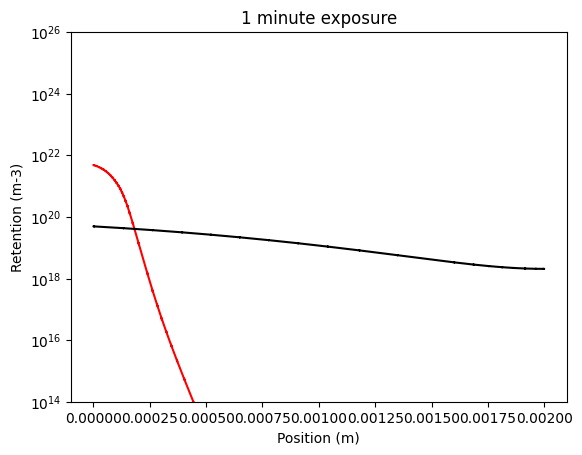

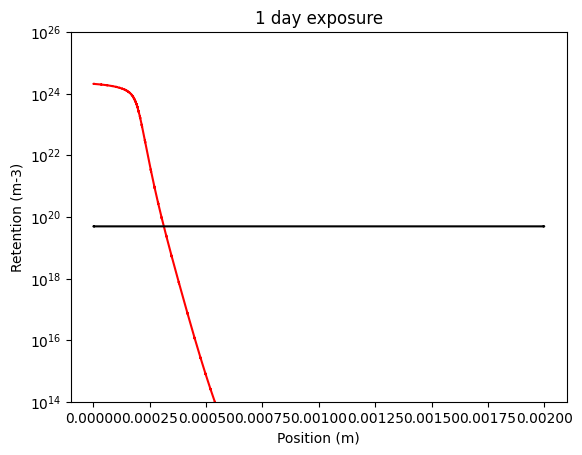

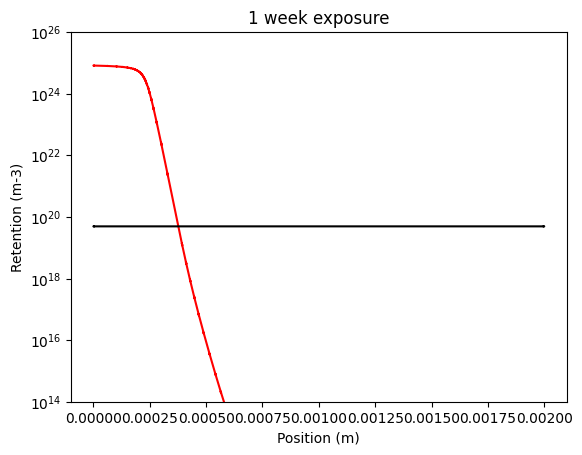

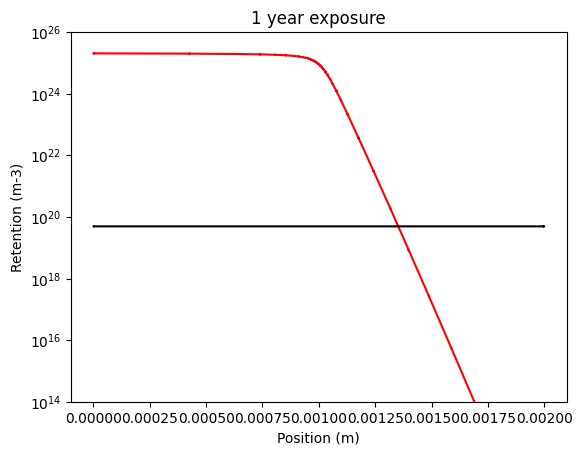

In [10]:
import matplotlib.pyplot as plt
import numpy as np
results_folder = "task17/"

data_damaged = np.genfromtxt(results_folder + "retention_profile.txt", delimiter=",", names=True)
data_standard = np.genfromtxt(results_folder + "retention_profile_standard.txt", delimiter=",", names=True)

t_damage = data_damaged["x"]
t_standard = data_standard["x"]

retention_damage_minute = data_damaged["t600e01s"]
retention_damage_day = data_damaged["t864e04s"]
retention_damage_week = data_damaged["t605e05s"]
retention_damage_fpy = data_damaged["t315e07s"]

retention_standard_minute = data_standard["t600e01s"]
retention_standard_day = data_standard["t864e04s"]
retention_standard_week = data_standard["t605e05s"]
retention_standard_fpy = data_standard["t315e07s"]

plt.figure()
plt.title("1 minute exposure")
plt.plot(t_damage, retention_damage_minute, color="red")
plt.plot(t_standard, retention_standard_minute, color="black")
plt.yscale("log")
plt.ylim(1e14, 1e26)
plt.xlabel("Position (m)")
plt.ylabel("Retention (m-3)")

plt.figure()
plt.title("1 day exposure")
plt.plot(t_damage, retention_damage_day, color="red")
plt.plot(t_standard, retention_standard_day, color="black")
plt.yscale("log")
plt.ylim(1e14, 1e26)
plt.xlabel("Position (m)")
plt.ylabel("Retention (m-3)")

plt.figure()
plt.title("1 week exposure")
plt.plot(t_damage, retention_damage_week, color="red")
plt.plot(t_standard, retention_standard_week, color="black")
plt.yscale("log")
plt.ylim(1e14, 1e26)
plt.xlabel("Position (m)")
plt.ylabel("Retention (m-3)")

plt.figure()
plt.title("1 year exposure")
plt.plot(t_damage, retention_damage_fpy, color="red")
plt.plot(t_standard, retention_standard_fpy, color="black")
plt.yscale("log")
plt.ylim(1e14, 1e26)
plt.xlabel("Position (m)")
plt.ylabel("Retention (m-3)")